# Phase 1 — Baseline AQI Prediction

## Objective
The objective of Phase 1 is to build a baseline machine learning model to predict
Air Quality Index (AQI) using a small set of raw pollutant measurements.

This phase establishes a reference point for model performance and helps
understand the basic relationship between individual pollutants and AQI before
introducing feature engineering or more complex modeling strategies.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/city_day_data')

df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01-01-2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,02-01-2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,03-01-2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,04-01-2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,05-01-2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
df.shape

(29531, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


## Dataset Overview
- Source: Public Kaggle air quality dataset
- Granularity: City-wise daily records
- Size: ~29,500 rows and 16 columns
- Target variable: AQI (continuous numerical value)
- Features include multiple air pollutants and metadata such as city and date

This dataset provides historical pollution measurements used to model AQI behavior.


In [ ]:
df.isnull().sum()

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


## Feature Selection
In Phase 1, a small subset of commonly measured pollutants was selected to
construct a simple baseline model.

Selected features:
- PM2.5
- PM10
- NO2
- CO
- SO2

These features were chosen due to their known relevance to air quality and
relatively lower proportion of missing values compared to other pollutants.
The target variable is AQI.


In [ ]:
target = 'AQI'

features = [
    'PM2.5',
    'PM10',
    'NO2',
    'CO',
    'SO2'
]

df_selected = df[features + [target]]

df_selected.head()

,PM2.5,PM10,NO2,CO,SO2,AQI
0,NaN,NaN,18.22,0.92,27.64,NaN
1,NaN,NaN,15.69,0.97,24.55,NaN
2,NaN,NaN,19.30,17.40,29.07,NaN
3,NaN,NaN,18.48,1.70,18.59,NaN
4,NaN,NaN,21.42,22.10,39.33,NaN


In [ ]:
df_selected.isnull().sum()

,0
PM2.5,4598
PM10,11140
NO2,3585
CO,2059
SO2,3854
AQI,4681


In [ ]:
df_selected = df_selected.dropna(subset=[target])

In [ ]:
for col in features:
    median_value = df_selected[col].median()
    df_selected[col].fillna(median_value, inplace=True)

/tmp/ipython-input-3466841616.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_selected[col].fillna(median_value, inplace=True)


In [ ]:
df_selected.isnull().sum()

,0
PM2.5,0
PM10,0
NO2,0
CO,0
SO2,0
AQI,0


In [ ]:
df_selected.shape

(24850, 6)

## Data Cleaning & Preprocessing
- Rows with missing AQI values were removed, as supervised learning requires a known target.
- Missing values in selected feature columns were handled using median imputation.
- Median was preferred over mean to reduce sensitivity to extreme pollution values.

After preprocessing, the dataset contained no missing values and was suitable for modeling.


In [ ]:
X = df_selected[features]
y = df_selected[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((19880, 5), (4970, 5))

## Train-Test Split
The dataset was split into training and testing sets using an 80–20 ratio.
- 80% of the data was used to train the model
- 20% was reserved for evaluation

This ensures that model performance is assessed on unseen data.


## Baseline Model
A Linear Regression model was used as the baseline estimator.

Linear regression was selected because:
- AQI is a continuous numerical target
- The model is simple and interpretable
- It provides a strong reference point for future improvements


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)


## Evaluation Metrics
Model performance was evaluated using:
- Root Mean Squared Error (RMSE)
- R² Score

RMSE measures the average magnitude of prediction error,
while R² indicates how much variance in AQI is explained by the model.


In [ ]:
rmse, r2

(np.float64(59.709379490756604), 0.8052970411797613)

## Results Interpretation
The baseline model achieved a reasonable RMSE and a high R² score,
indicating that raw pollutant features explain a substantial portion of AQI variation.

These results establish a strong numerical baseline, though performance may be
inflated by direct access to raw pollutant variance.


In [ ]:
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})

coefficients


,Feature,Coefficient
0,PM2.5,1.143939
1,PM10,0.274600
2,NO2,0.251248
3,CO,11.664149
4,SO2,0.772031


## Feature Importance (Coefficients)
Model coefficients indicate the relative contribution of each pollutant to AQI prediction.

Higher coefficients suggest stronger linear influence on AQI,
with carbon monoxide and particulate matter showing notable impact.


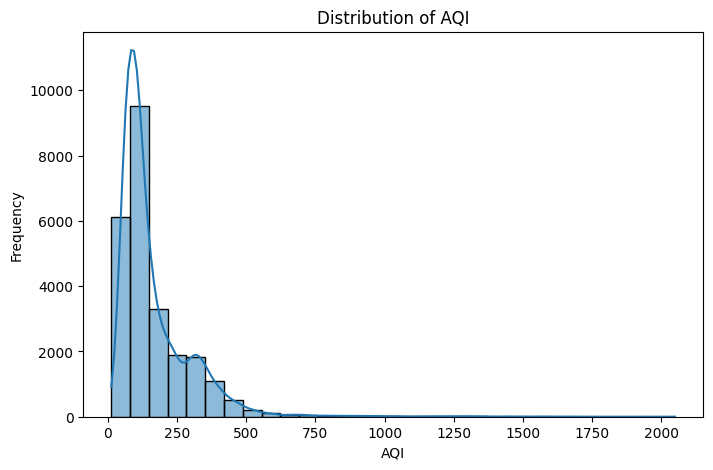

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df_selected['AQI'], bins=30, kde=True)
plt.title('Distribution of AQI')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()


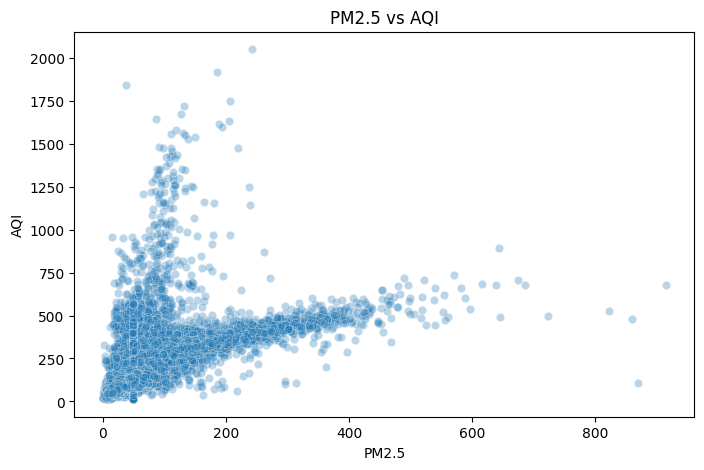

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_selected['PM2.5'], y=df_selected['AQI'], alpha=0.3)
plt.title('PM2.5 vs AQI')
plt.xlabel('PM2.5')
plt.ylabel('AQI')
plt.show()


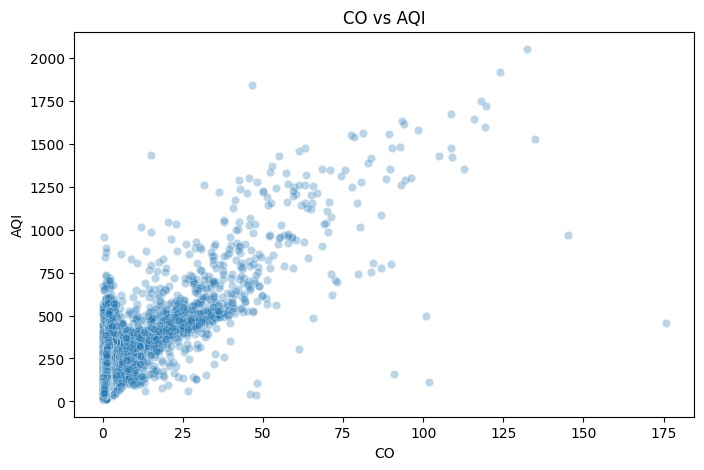

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_selected['CO'], y=df_selected['AQI'], alpha=0.3)
plt.title('CO vs AQI')
plt.xlabel('CO')
plt.ylabel('AQI')
plt.show()


## Exploratory Data Analysis (Summary)
- AQI distribution is right-skewed, with most days experiencing low to moderate pollution.
- PM2.5 shows a strong positive relationship with AQI at lower ranges.
- Relationships become noisier at higher AQI levels, indicating increased complexity.


## Assumptions & Limitations
- Assumes linear relationships between pollutants and AQI.
- Does not account for temporal patterns or city-specific effects.
- Performance may degrade during extreme pollution events.

This phase prioritizes numerical performance over interpretability.


## Conclusion
Phase 1 establishes a strong baseline for AQI prediction using raw pollutant features.
While performance metrics are high, the model relies heavily on unstructured variance.

This phase serves as a reference point for evaluating the impact of feature engineering
and more realistic modeling approaches in later phases.
